# Assignment 18

In [46]:
# import dependencies
from sklearn import tree
import graphviz
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

In [47]:
# define functions
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [48]:
# prepare data
dataset = pd.read_csv('../datasets/Movie_Data_File.csv')
dataset = dataset.drop(['Release_year'], axis=1)
dataset = dataset.dropna()

language_counts = dataset['Original_language'].value_counts()
dataset = dataset[dataset['Original_language'].isin(language_counts[language_counts > 1].index)]

# Compute correlation matrix
correlation_matrix = dataset.select_dtypes(include=['number']).corr()

# Correlation with Owner_rating
print(correlation_matrix['Owner_rating'].sort_values(ascending=False))

dataset.head()

Owner_rating        1.000000
Average_rating      0.806373
List_appearances    0.524903
★★★★½               0.507417
★★★★                0.484008
Likes               0.442341
Total_ratings       0.425383
★★★★★               0.407280
★★★½                0.405703
Watches             0.398737
Fans                0.306830
★★★                 0.242733
Runtime             0.218196
★★½                -0.008394
★★                 -0.053491
★                  -0.158070
½                  -0.184304
★½                 -0.224291
Name: Owner_rating, dtype: float64


,Film_title,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,Spoken_languages,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
1,Mad Max: Fury Road,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,['English'],...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,"['English', 'French', 'German', 'Italian', 'La...",...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,"['English', 'Japanese']",...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,['Japanese'],...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/
6,Big Trouble in Little China,John Carpenter,"['Kurt Russell', 'Kim Cattrall', 'Dennis Dun',...",3.72,3.5,"['Comedy', 'Adventure', 'Fantasy', 'Action']",100.0,['USA'],English,"['English', 'Cantonese']",...,1435,6083,8842,30582,38642,53871,17844,24938,183927,https://letterboxd.com/film/big-trouble-in-lit...


In [49]:
# split dataset
dataset_train, dataset_test = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['Original_language'])

In [50]:
# create DecisionTreeRegressor
features = ['List_appearances', 'Average_rating']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(dataset_train[features].values, dataset_train['Owner_rating'].values)

DecisionTreeRegressor(max_depth=3)

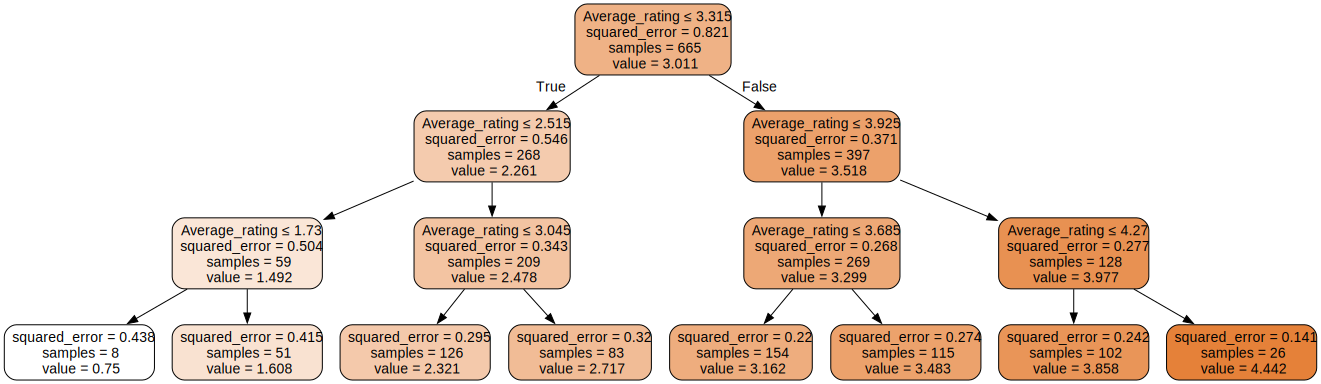

In [51]:
# create plot tree
plot_tree_regression(dt_regression, features)

In [52]:
# model evaluation
predictionsOnTrainset = dt_regression.predict(dataset_train[features])
predictionsOnTestset = dt_regression.predict(dataset_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, dataset_train.Owner_rating)
rmseTest = calculate_rmse(predictionsOnTestset, dataset_test.Owner_rating)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.5234994366370352
RMSE on test set 0.5823842753546532


c:\Users\Liam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Liam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


## Conclusion

## Conclusion

The decision tree regressor was created with a maximum depth of 3, using `List_appearances` and `Average_rating` as features to predict `Owner_rating`. The RMSE for the training set was lower than for the test set, which is expected since the model is optimized for the training data and may not generalize perfectly to unseen data. The difference in RMSE between the train and test sets was small, indicating that the model is not overfitting and generalizes reasonably well. The plot generated by the `plot_tree_regression` function helped visualize how the tree splits the data based on the selected features. The tree structure was interpretable, and each node represented a decision boundary that contributed to the prediction of `Owner_rating`. Overall, the model achieved a good balance between simplicity and predictive performance.